# 世界500強企業分析

1.各國家企業營收地圖分布

2.文字雲表示傑出的企業

3.營收前10的企業

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font = 'Microsoft YaHei',font_scale = 1.3)

from pyecharts import options as opts
from pyecharts.charts import Bar,Map,WordCloud,Grid,Pie
from pyecharts.faker import Faker
from pyecharts.globals import ThemeType


In [2]:
df = pd.read_excel('C:/Users/abcd8/OneDrive/桌面/resume/project1/2021世界五百強企業.xlsx')
df.shape

(500, 8)

In [3]:
#檢查空值
df.isnull().sum()

排名          0
公司名称(中文)    0
行业(官方)      0
行业(个人观点)    0
营收(亿人民币)    0
利润(亿人民币)    0
利润率         0
国家          0
dtype: int64

In [4]:
df['营收(亿人民币)']

0      36602.583611
1      25308.381260
2      25272.135504
3      18588.148454
4      18573.092424
           ...     
495     1599.015847
496     1595.677336
497     1594.760882
498     1579.181164
499     1573.905007
Name: 营收(亿人民币), Length: 500, dtype: float64

In [5]:
df['国家'].unique()

array(['美国', '中国', '日本', '德国', '沙特阿拉伯', '韩国', '英国', '荷兰', '新加坡', '瑞士',
       '法国', '意大利', '俄罗斯', '西班牙', '印度', '加拿大', '巴西', '芬兰', '卢森堡', '泰国',
       '比利时', '墨西哥', '挪威', '爱尔兰', '澳大利亚', '马来西亚', '印度尼西亚', '丹麦', '瑞典',
       '土耳其'], dtype=object)

In [6]:
country_dict = {'美国': 'United States', '中国': 'China', '日本': 'Japan', '德国': 'Germany', '沙特阿拉伯': 'Saudi Arabia', '韩国': 'South Korea', '英国': 'United Kingdom', '荷兰': 'Netherlands', '新加坡': 'Singapore', '瑞士': 'Switzerland', '法国': 'France', '意大利': 'Italy', '俄罗斯': 'Russia', '西班牙': 'Spain', '印度': 'India', '加拿大': 'Canada', '巴西': 'Brazil', '芬兰': 'Finland', '卢森堡': 'Luxembourg', '泰国': 'Thailand', '比利时': 'Belgium', '墨西哥': 'Mexico', '挪威': 'Norway', '爱尔兰': 'Ireland', '澳大利亚': 'Australia', '马来西亚': 'Malaysia', '印度尼西亚': 'Indonesia', '丹麦': 'Denmark', '瑞典': 'Sweden', '土耳其': 'Turkey'}
df['country'] = df['国家'].map(country_dict)
df['country']

0      United States
1              China
2      United States
3              China
4              China
           ...      
495    United States
496            China
497        Australia
498        Singapore
499    United States
Name: country, Length: 500, dtype: object

# 按照國家以及營收產出地圖分布

In [7]:
data = []
for i in range(len(df)):
    data.append((df.iloc[i]['country'], df.iloc[i]['营收(亿人民币)']))
data

[('United States', 36602.583611),
 ('China', 25308.3812597),
 ('United States', 25272.135504),
 ('China', 18588.1484536),
 ('China', 18573.0924236),
 ('United States', 17970.026415),
 ('United States', 17589.763466),
 ('United States', 16832.707001),
 ('Japan', 16805.2592037),
 ('Germany', 16624.802865),
 ('United States', 16071.33011),
 ('United States', 15594.643108),
 ('China', 15345.694925),
 ('Saudi Arabia', 15040.7252182),
 ('South Korea', 13140.2745584),
 ('China', 12536.3968334),
 ('United States', 12430.6445879),
 ('United Kingdom', 12012.0935),
 ('Netherlands', 11992.127895),
 ('China', 11965.9042184),
 ('United States', 11948.399947),
 ('China', 11910.3278294),
 ('United States', 11881.302422),
 ('Germany', 11509.8308853),
 ('China', 11259.3050922),
 ('United States', 11243.58136),
 ('United States', 10916.341821),
 ('United States', 10500.009861),
 ('China', 10073.4398006),
 ('United States', 10010.427042),
 ('Singapore', 9622.3938723),
 ('China', 9464.9470751),
 ('United S

# 營收世界地圖

In [8]:
world_map = (
    Map()
    .set_global_opts(
        title_opts=opts.TitleOpts(title="World Map"),
        visualmap_opts=opts.VisualMapOpts(max_=200),
    )
    .add(series_name="Value", data_pair=data, maptype="world")
)
# world_map.render("world_map.html")
world_map.render_notebook()

# 進入五百強企業國家分布

In [9]:
##### import pandas as pd
from pyecharts import options as opts
from pyecharts.charts import Bar
from pyecharts.faker import Faker


# 讀取 Excel 檔案
df = pd.read_excel('C:/Users/abcd8/OneDrive/桌面/resume/project1/2021世界五百強企業.xlsx')

# 進入五百強企業的國家數量統計
country_count = df['国家'].value_counts()

c = (
    Bar()
    .add_xaxis(list(country_count.index))
    .add_yaxis("數量統計", list(country_count.loc[:]))
    .set_global_opts(
        title_opts=opts.TitleOpts(title="五百強企業國家統計", subtitle=""),
        brush_opts=opts.BrushOpts(),
    )
#     .render("bar_with_brush.html")
    .render_notebook()
)
c

In [10]:
import pandas as pd
from pyecharts import options as opts
from pyecharts.charts import Pie

# 讀取Excel檔案
df = pd.read_excel('C:/Users/abcd8/OneDrive/桌面/resume/project1/2021世界五百強企業.xlsx')

# 計算每個國家進入五百強的公司數量
country_counts = df["国家"].value_counts()

# 計算每個國家進入五百強的百分比
country_percentages = country_counts / country_counts.sum() * 100

# 轉換為pyecharts所需的數據格式
data = [(country, percentage) for country, percentage in country_percentages.items()]

# 繪製圓餅圖
pie = (
    Pie()
    .add("", data)
    .set_global_opts(
        title_opts=opts.TitleOpts(title="全球五百強企業各國家百分比圓餅圖"),
        legend_opts=opts.LegendOpts(
            orient="vertical", pos_top="15%", pos_left="2%"
        ),
        tooltip_opts=opts.TooltipOpts(formatter="{b}: {d}%"),
    )
    .set_series_opts(
        label_opts=opts.LabelOpts(
            formatter="{b}: {d}%",
            font_size=16,
            position="inside",
            font_weight="bold",
            font_family="Microsoft YaHei",
        ),
    )
)

# 設置中文顯示
pie.set_colors(["#c23531", "#2f4554", "#61a0a8", "#d48265", "#91c7ae", "#749f83", "#ca8622", "#bda29a", "#6e7074", "#546570"])
pie.render_notebook()

# 以文字雲結合營收產出較突出的公司名稱

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\abcd8\AppData\Local\Temp\jieba.cache
Loading model cost 0.661 seconds.
Prefix dict has been built successfully.


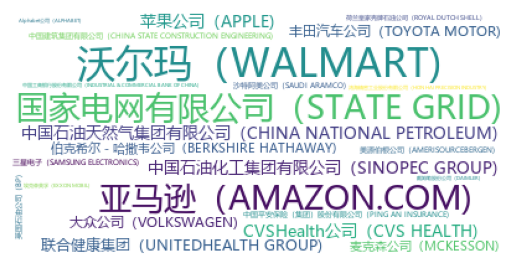

In [11]:
import pandas as pd
import jieba
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 讀取 Excel 文件
data = pd.read_excel('C:/Users/abcd8/OneDrive/桌面/resume/project1/2021世界五百強企業.xlsx')
# 獲取公司名和營收
names = data['公司名称(中文)'].tolist()
revenues = data['营收(亿人民币)'].tolist()
# 對營收進行排序
revenues.sort(reverse=True)
# 構建字典
word_dict = dict(zip(names, revenues))

# 使用 jieba 分詞
text = ' '.join(jieba.lcut(' '.join(names)))

# 生成文字雲
wordcloud = WordCloud(background_color='white', font_path='msyh.ttc').generate_from_frequencies(word_dict)

# 繪製文字雲
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


# 營收前10的公司且顯示營收與利潤

In [12]:
import pandas as pd
from pyecharts.charts import Bar
from pyecharts import options as opts

# 讀取 Excel 檔案
df = pd.read_excel('C:/Users/abcd8/OneDrive/桌面/resume/project1/2021世界五百強企業.xlsx')

# 按照營收排序，取前10筆資料
df = df.sort_values(by="营收(亿人民币)", ascending=False).head(10)

# 繪製柱狀圖
bar = (
    Bar()
    .add_xaxis(df["公司名称(中文)"].tolist())
    .add_yaxis("营收(亿人民币)", df["营收(亿人民币)"].tolist(), label_opts=opts.LabelOpts(position="inside"))
    .add_yaxis("利润(亿人民币)", df["利润(亿人民币)"].tolist(), label_opts=opts.LabelOpts(position="inside"))
    .set_global_opts(
        title_opts=opts.TitleOpts(title="營收前10的公司"),
        xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=-15)),
    )
)

# 顯示圖表
bar.render_notebook()
